## <center>Scripting Week 6</center>
# <center>Visualization</center>

In [2]:
%matplotlib inline
import pandas as pd

## Today

- Visualization
- Wide vs. Long - reshaping
- Collecting Data
- Joins in Pandas
- More Practice!

## Final Project Ideas

# Review

# Characterizing Data

What do we need to know about our data before visualizating it?

- Number of dimensions
- Type of data
    - Discrete vs. Continuous
    - Dependent and Independent variables
    - Relationships: nominal, ordinal, numeric

## Discrete vs. Continous

*Discrete* variables are countable, and exist on a identifiable, finite scale.

- How many plants do you have?
- What was the result of a coin flip?

*Continous* variables exist in an infinite scale.

- How much does a cat weight?
- At what time was a book checked out?

Think of your range of realistic values: can you only select specific values within that range, or can you feasibly select any value?

- *How many books are checked out?*
- *What was the temperature yesterday?*

* You can group by discrete variables. Grouping by continous variables would be pointless.

### Precision

* Much data is discrete by sampled from a continous distribution. This can be treated as continous data.

e.g. Age saved by year, even though you *could* have infinite precision.

## Types of Discrete Variables

*Nominal* or *categorical*: Can be counted but not ordered.

- e.g. Country GDP (is there a natural order between China, Lichtenstein, and US?)

*Ordinal*: Can be counted and ordered.
    
- e.g. Online product ratings

*Numerical* or *interval*: Ordered, with a meaningful relationship/distance between values.

- e.g. Counts or frequencies

## Independent vs. Dependent

- Independent: The variable that is controlled in an experiment
    - e.g. 'age', 'gender'
    - e.g. 'diet' in a study of healthy eating
- Dependent: The variable that is measured or changes
    - e.g. 'blood pressure', 'weight' in a study of healthy eating

Outside of experimental design, you don't always know what's dependent or independent.

## Number of Dimensions

How many different variables are you trying to visualize at once?

Examples:

- Univariate: Heights of a group of people
- 2-dimensional: What's the relationship between cyclinders in an engine and fuel economy?
- 3-dimensional: What's the relationship between cylinders in an engine and fuel economy, grouped by weight class?

## Size of the Data

How many data points do you have?

If not many: no need to visualize!

## Relationships

- Heirarchical: some measures have parent/child relationships.
    - e.g. folder size on your computer, book counts by call number
- Network relationships: links between data points.
    - e.g. social network data

## Exercises

In [8]:
cats = pd.read_csv('https://raw.githubusercontent.com/organisciak/Scripting-Course/master/data/cat_data.tsv', sep='\t')
beer = pd.read_csv('https://raw.githubusercontent.com/organisciak/Scripting-Course/master/data/beers.csv')
movies = pd.read_csv('https://raw.githubusercontent.com/organisciak/Scripting-Course/master/data/movielens_small.csv')
imls = pd.read_csv('https://raw.githubusercontent.com/organisciak/Scripting-Course/master/data/imls_mini_by_state.csv')
mpg = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/mpg.csv', index_col=0)

In [36]:
cats.head()

,Sex,Bwt,Hwt
0,M,2.0,6.5
1,M,2.0,6.5
2,M,2.1,10.1
3,M,2.2,7.2
4,M,2.2,7.6


- Sex: Ordinal
- Bwt: Continuous
- Hwt: Continuous

In [38]:
beer.head()

,abv,ibu,id,name,type,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


- abv: continuous
- type: nominal
- ounces: continuous or interval

In [40]:
movies.head()

,userId,rating,title,genres,timestamp,year
0,1,2.5,Dangerous Minds,Drama,1260759144,1995
1,7,3.0,Dangerous Minds,Drama,851868750,1995
2,31,4.0,Dangerous Minds,Drama,1273541953,1995
3,32,4.0,Dangerous Minds,Drama,834828440,1995
4,36,3.0,Dangerous Minds,Drama,847057202,1995


- genres: nominal/categorical
- rating: ordinal (often treated as interval)
- timestamp: continuous
- year: continuous or interval

# Visualization

Why visualize?

## Visualization in Pandas

Pandas uses a library called `matplotlib` under the hood - another part of the 'Scipy Stack'.

Basic line plot:

```
df.plot()
```

That's it!

Make plots show in a notebook, rather than saving to your computer.

For interactive plots:

In [95]:
%matplotlib notebook

For non-interactive (image-only) plot:

In [97]:
%matplotlib inline

*Run this once.*

**Feel free to experiment, but for now, use the non-interactive version. There are some surprises with interactive plots that we'll return to**

In [116]:
# Changing default size (IGNORE -- this is for better slide presentation)
import matplotlib
# Default (6,4) at DPI 72
matplotlib.rcParams['figure.figsize'] = (6,4)
matplotlib.rcParams['figure.dpi'] = (150)

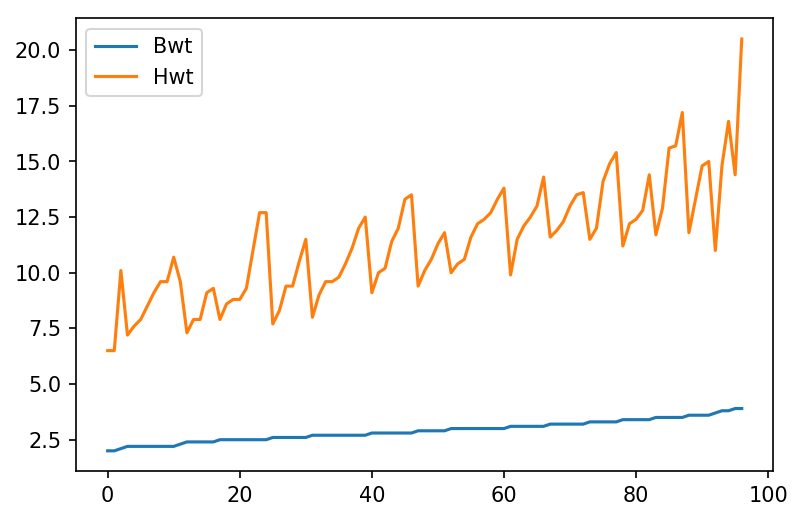

In [115]:
cats.plot()

*What's the y-axis? What's the x-axis?*

Hmmm... some problems:

- There's no continuous dependent variable for a line chart.
- It tries to plot *every* int or float column as a line.
- The 'index as x-axis' isn't insightful.

Explicitly setting an x and y plot:

```python
df.plot(x=..., y=...)
```

e.g.

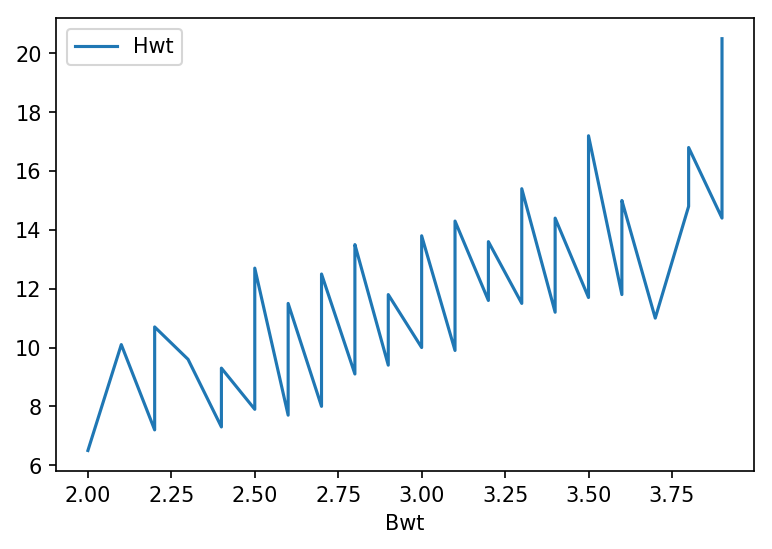

In [117]:
cats.plot(x='Bwt', y='Hwt')

## Setting the type of plot

Use the `kind` argument:

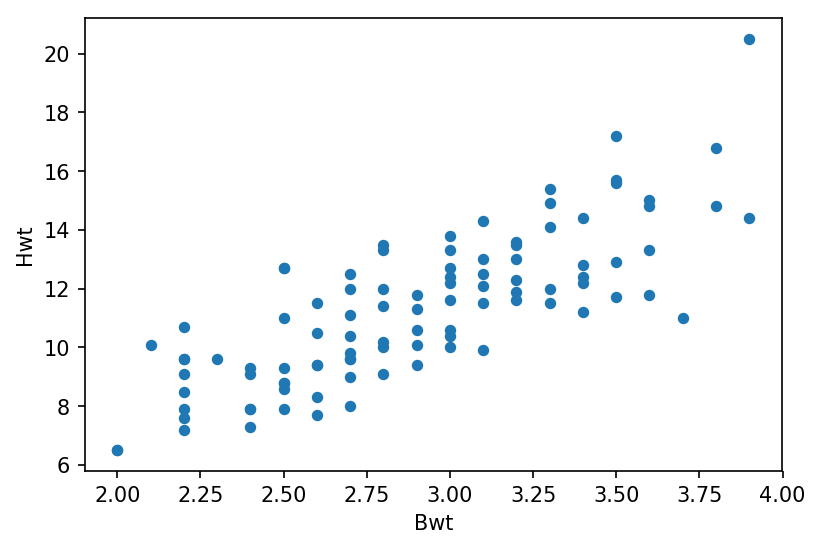

In [118]:
cats.plot(x='Bwt', y='Hwt', kind='scatter')

# Kinds of Plots in Matplotlib

## *Bar Chart* and *Horizontal Bar Chart*

`kind='bar'`, `kind='barh'`

Good for categorical discrete data.

Dimensions: 2 axes. Color can be used for 3rd dimension.

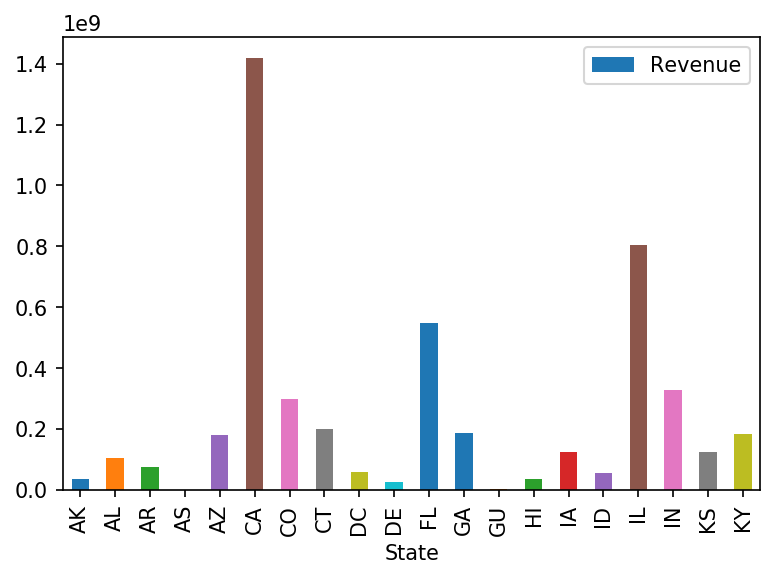

In [119]:
imls.head(20).plot(kind='bar', x='State', y='Revenue')

*Does color mean anything here?*

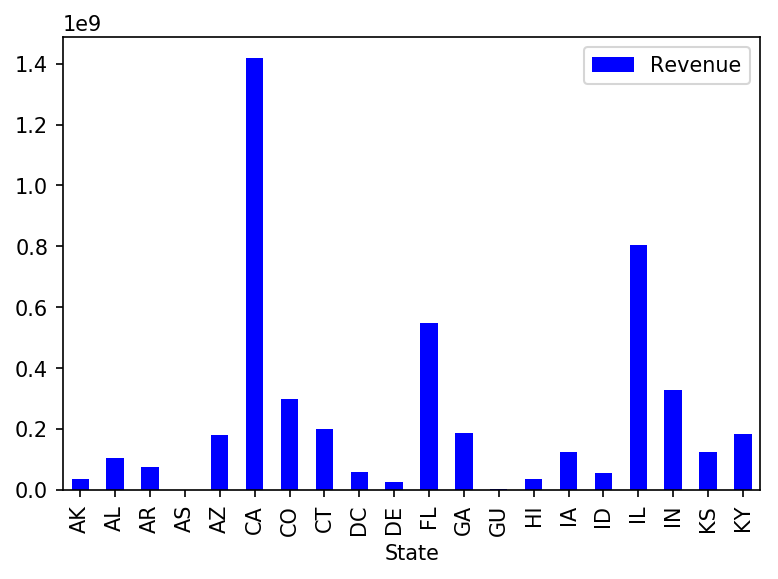

In [120]:
imls.head(20).plot(kind='bar', x='State', y='Revenue', color='blue')

FYI: Our 'easy' approach to visualization, through Pandas, can take color names or codes, but you can't easily color against a variable.

'barh' is just 'bar' rotated (literally - 'x' refers to the vertical axis).

Good for many categories: easier to read and - on screens - the height of an image can scale better than the width.

<IPython.core.display.Javascript object>


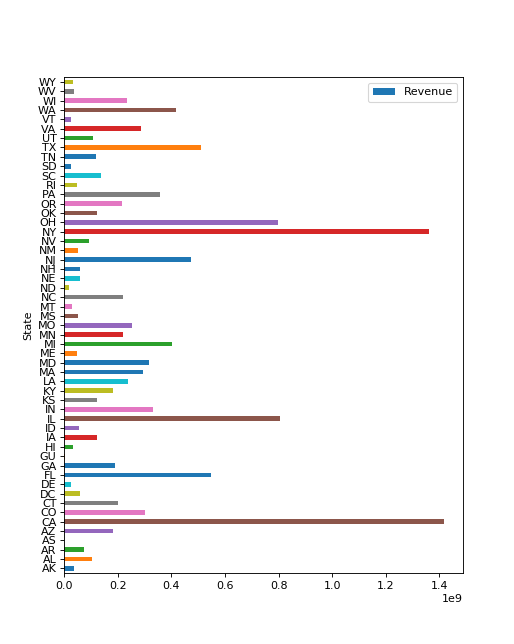

In [59]:
imls.plot(kind='barh', x='State', y='Revenue')

## Univariate Data

*What might you want to know from a single dimension?*

Most often: distribution / density

`kind = 'hist'`, `kind = 'density'` (or 'kde')

### Histogram

Essentially, a bar chart that organizes continuous data into bins.

In [80]:
beer[['abv']].head()

,abv
0,0.050
1,0.066
2,0.071
3,0.090
4,0.075


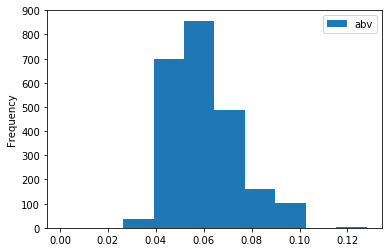

In [100]:
beer[['abv']].plot(kind='hist')

- *What are the intervals for the bins?*
- *Is this a DataFrame or Series being plotted?*
  - *Will the other datatype plot in the same way?*

To change, use the `bins` argument to specify how many bars there will be across the range.

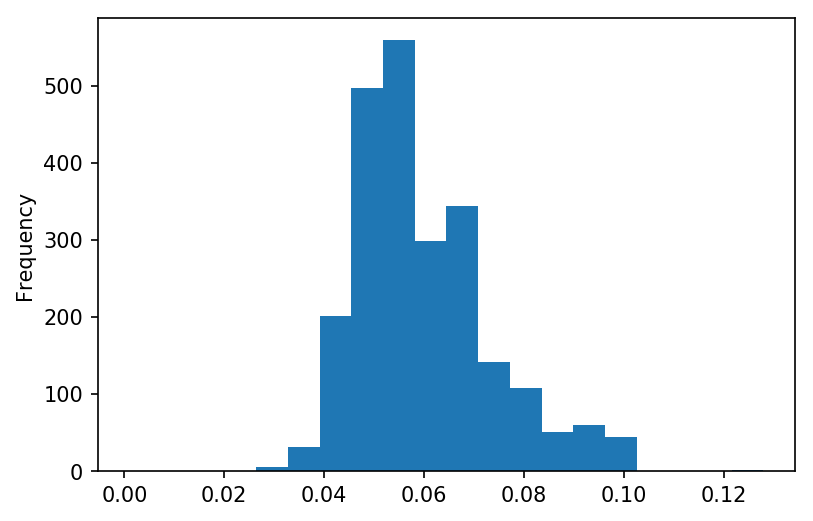

In [124]:
beer.abv.plot(kind='hist', bins=20)

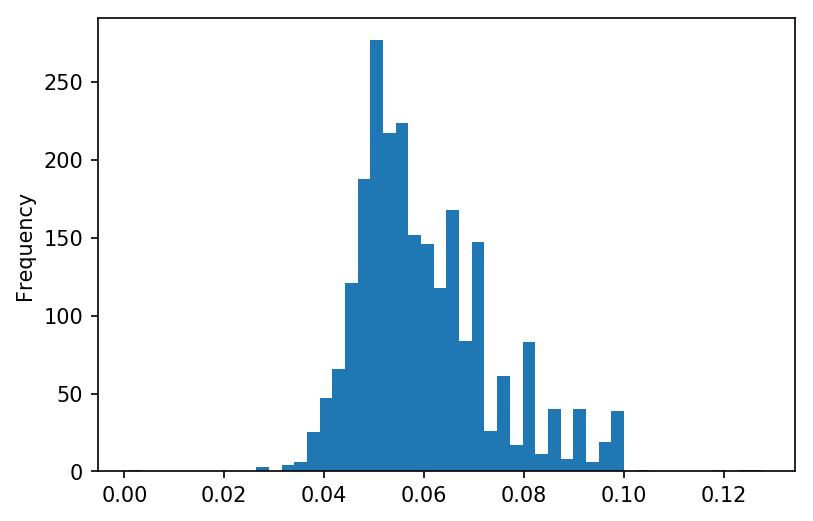

In [128]:
beer.abv.plot(kind='hist', bins=50)

Too little:

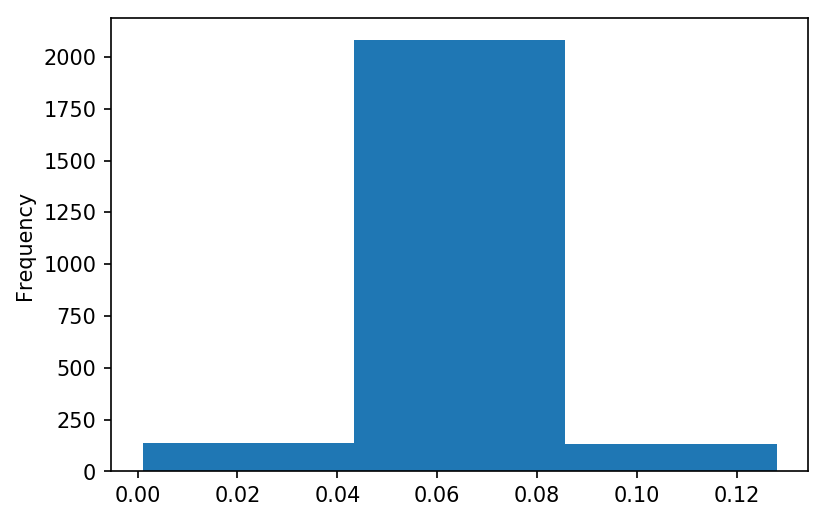

In [129]:
beer.abv.plot(kind='hist', bins=3)

Too much:

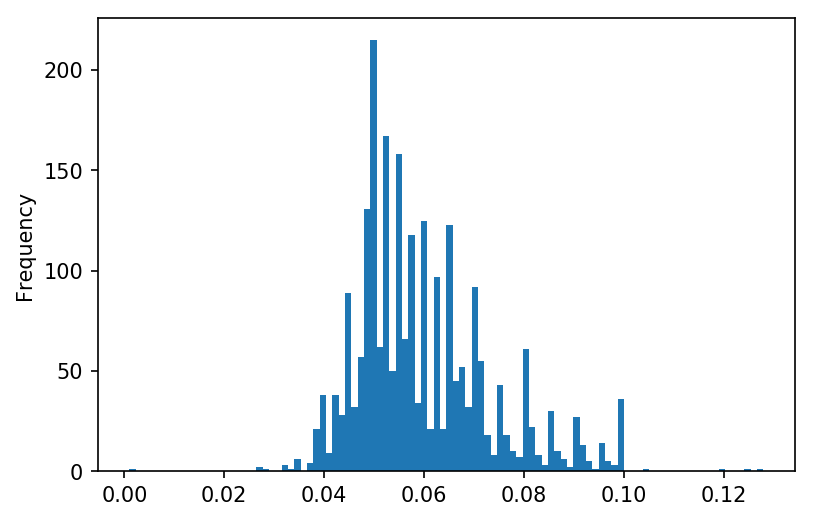

In [130]:
beer.abv.plot(kind='hist', bins=100)

### Kernel Density

Like a histogram, but with an interpolated line tracing the distribution shape.

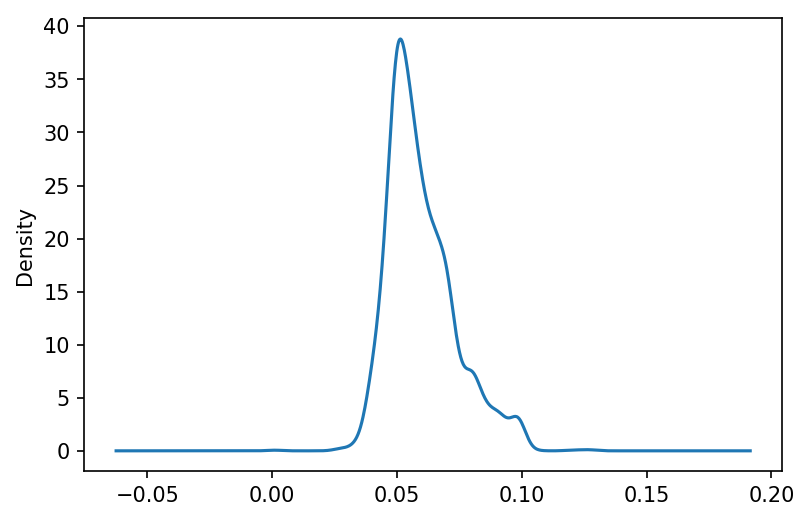

In [132]:
beer.abv.plot(kind='density')

- interactive plots (note active plots)
- There are many options for customizing plots - this is where good online searching can help you!

## Multi-variate version of a histogram: Hexplot

- Color is used to show density across two dimensions.

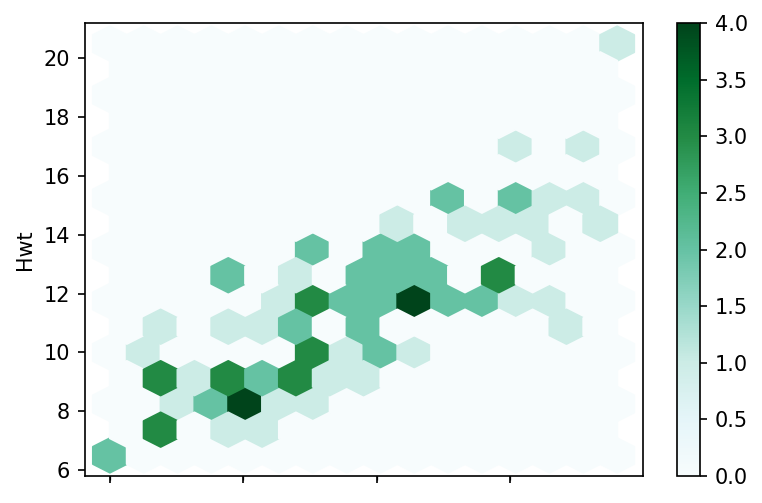

In [189]:
cats.plot(kind='hexbin', x='Bwt', y='Hwt', gridsize=15)

## Pie Charts: Univariate data that adds to a whole

`kind = 'plot'`

In [143]:
counts_by_category = beer.type.value_counts()
counts_by_category.head()

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
Name: type, dtype: int64

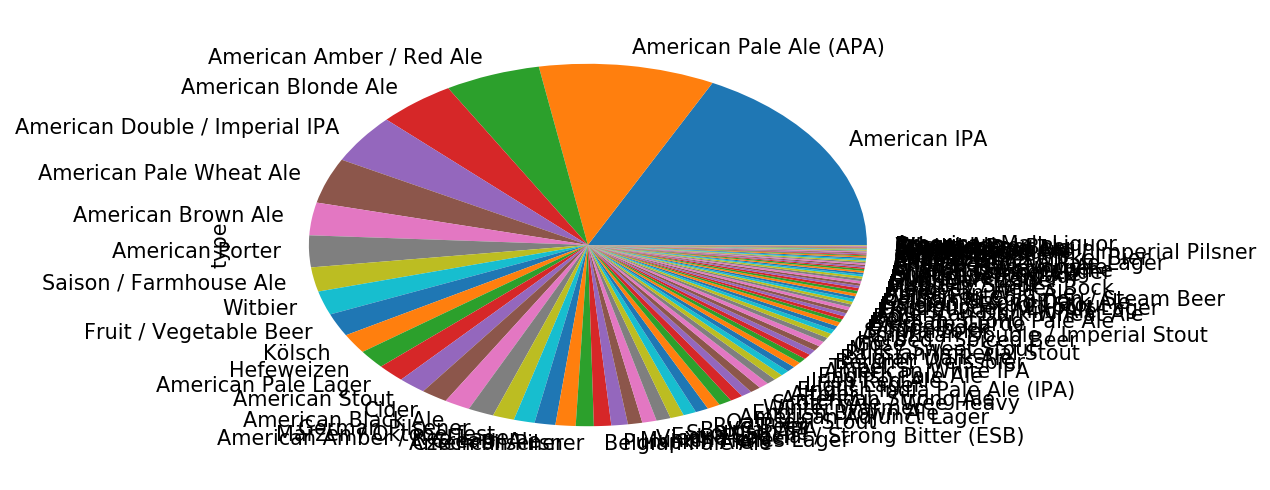

In [147]:
counts_by_category.plot(kind='pie')

Incomplete:

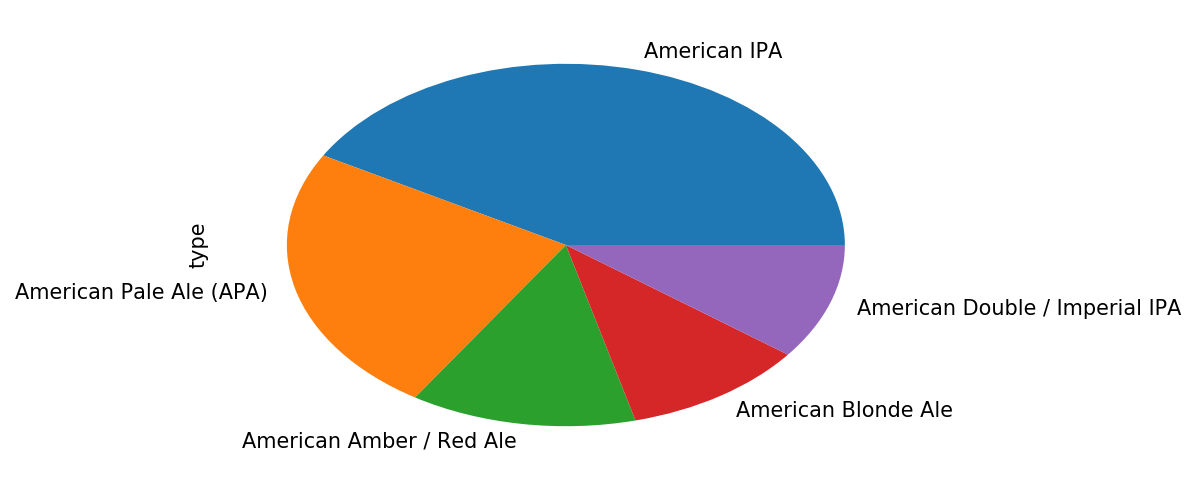

In [148]:
counts_by_category[:5].plot(kind='pie')

*How might we combine all the other values into an 'other' category?*

(No trick, just break down the problem)

## Line Chart

The default plot. Useful for showing change in continuous or interval data.

In [206]:
unique_movies = movies[['title', 'year']].drop_duplicates()
movies_by_year = unique_movies.groupby('year')[['title']].count()
movies_by_year.sample(3)

,title
year,
1999,261
1989,147
1968,45


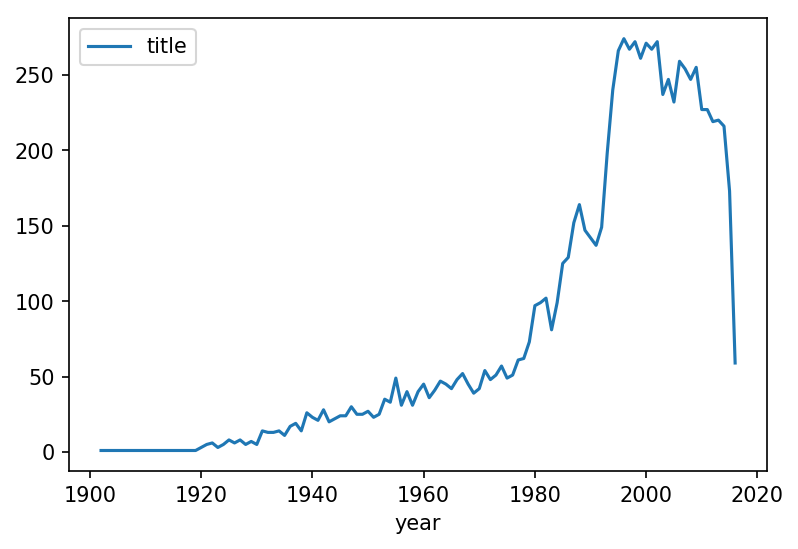

In [201]:
movies_by_year.plot()

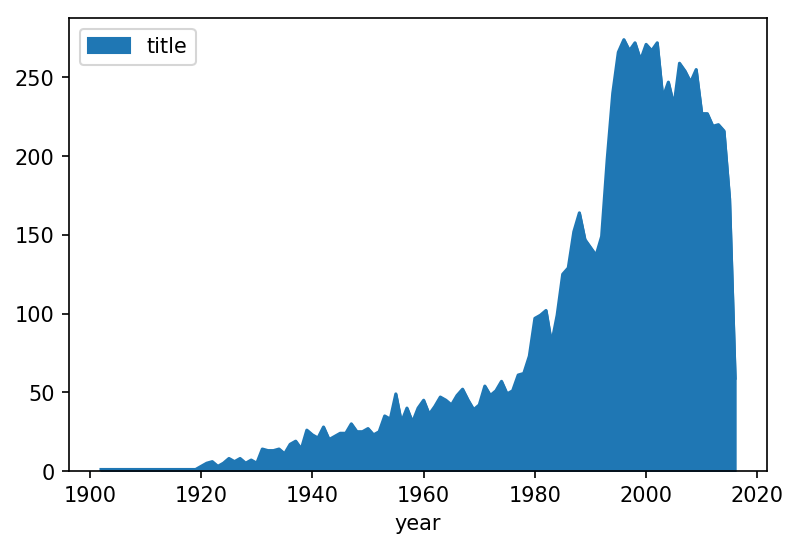

In [204]:
movies_by_year.plot(kind='area')

## <center>Exercises</center>

## <center>Where to next?</center>

*matplotlib* is fairly low-level: it's very customizable, but more advanced to use.

Plotting in Pandas is higher-level: it builds on top of *matplotlib*, making some choices for you in exchange for ease of use.

If the out of the box plots don't work:

- (1) **Customizing default charts**: Read the pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
- (3) **Use matplotlib directly**: Use the [visualization gallery](https://matplotlib.org/gallery.html) for ideas.

![](../images/matplot-gallery.png)

### Seaborn

Looking for more advanced visualizations without the complexity of *matplotlib*? 

*Seaborn* is a high-level visualization library that makes certain types of *advanced* graphs easier to plot.

In [215]:
import seaborn as sns

[Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)
![Seaborn Gallery](../images/seaborn-gallery.png)

#### Linear Regression with `lmplot`

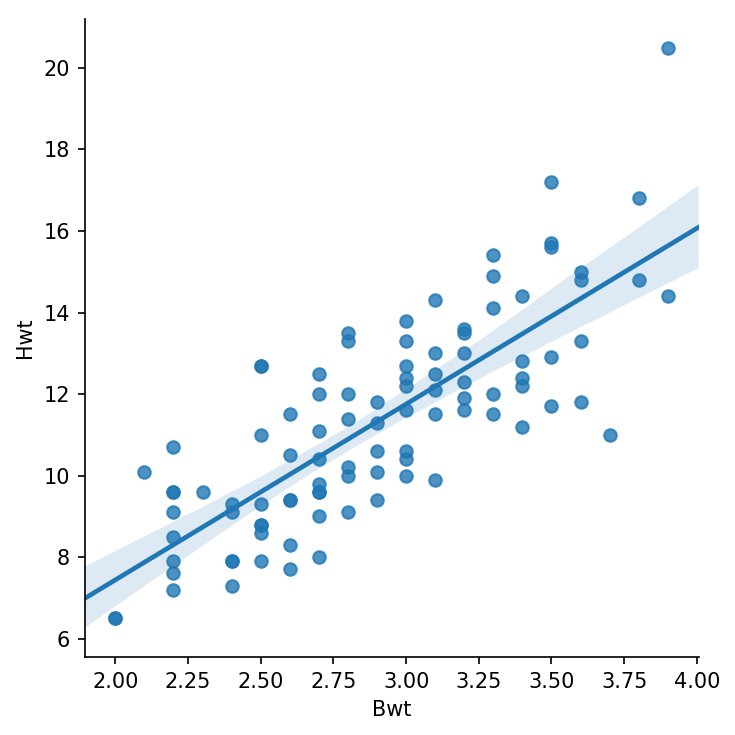

In [214]:
sns.lmplot(data=cats, x='Bwt', y='Hwt')

Various alternate regression fits are possible: read the docs!

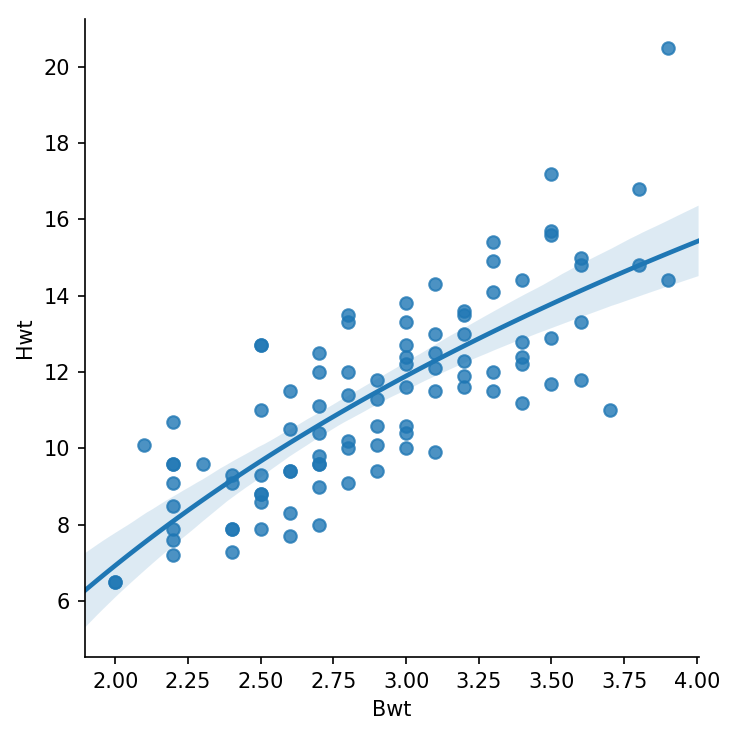

In [219]:
sns.lmplot(data=cats, x='Bwt', y='Hwt', logx=True)